<a href="https://colab.research.google.com/github/anse128/RNA/blob/main/Perceptron_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Esto montará tu Google Drive en el directorio '/content/drive'
drive.mount('/content/drive')


df = pd.read_excel('/content/drive/My Drive/Inteligencia computacional/DatosconClases.xlsx')

# 'df' es un DataFrame de pandas que contiene los datos de tu archivo .xlsx

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


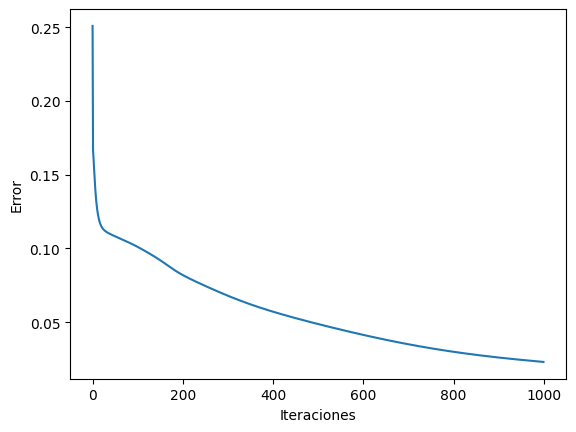

Error en el conjunto de prueba: 0.15760867392187283
Precisión en el conjunto de prueba: 0.8181818181818182


In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función sigmoide como función de activación
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Definir la derivada de la función sigmoide
def sigmoid_prime(x):
  return sigmoid(x) * (1 - sigmoid(x))

# Definir la función softmax como función de activación para la capa de salida
def softmax(x):
  exp_x = np.exp(x)
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Definir la función de pérdida como entropía cruzada
def cross_entropy(y_true, y_pred):
  return -np.sum(y_true * np.log(y_pred), axis=1)

# Definir la función para calcular el error cuadrático medio
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

# Definir la arquitectura de la red
n_inputs = 9 # Número de características de entrada
n_hidden = 10 # Número de neuronas en la capa oculta
n_outputs = 2 # Número de neuronas en la capa de salida (clases)
learning_rate = 0.01 # Tasa de aprendizaje
epochs = 1000 # Número máximo de iteraciones

# Inicializar los pesos aleatoriamente con distribución normal
W1 = np.random.randn(n_inputs, n_hidden) # Pesos entre la capa de entrada y la capa oculta
b1 = np.random.randn(n_hidden) # Bias de la capa oculta
W2 = np.random.randn(n_hidden, n_outputs) # Pesos entre la capa oculta y la capa de salida
b2 = np.random.randn(n_outputs) # Bias de la capa de salida



# Separar los datos en características (X) y etiquetas (y)
X = df.iloc[:, :9].values # Seleccionar las primeras 9 columnas como características
y = df.iloc[:, -3].values # Seleccionar la columna "Clase Entrega 1" como etiquetas

# Codificar las etiquetas como vectores binarios
# La clase 1 se codifica como [1, 0] (aves)
# La clase 2 se codifica como [0, 1] (otras especies)
y_encoded = np.zeros((len(y), n_outputs))
for i in range(len(y)):
  if y[i] == 1:
    y_encoded[i] = [1, 0]
  else:
    y_encoded[i] = [0, 1]

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalizar los datos para que tengan media cero y desviación estándar uno
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar la red neuronal con el algoritmo de backpropagation
errors = [] # Lista para guardar el error en cada iteración
for epoch in range(epochs):
  # Propagar los datos de entrada por la red
  # Capa de entrada
  a0 = X_train
  # Capa oculta
  z1 = a0.dot(W1) + b1 # Combinación lineal
  a1 = sigmoid(z1) # Función de activación
  # Capa de salida
  z2 = a1.dot(W2) + b2 # Combinación lineal
  a2 = softmax(z2) # Función de activación

  # Calcular el error cometido por la red
  error = mse(y_train, a2)
  errors.append(error)

  # Ajustar los pesos con la regla del backpropagation
  # Capa de salida
  delta2 = (y_train - a2) * learning_rate # Gradiente del error respecto a z2
  W2 += a1.T.dot(delta2) # Actualización de los pesos
  b2 += np.sum(delta2, axis=0) # Actualización del bias
  # Capa oculta
  delta1 = delta2.dot(W2.T) * sigmoid_prime(z1) # Gradiente del error respecto a z1
  W1 += a0.T.dot(delta1) # Actualización de los pesos
  b1 += np.sum(delta1, axis=0) # Actualización del bias

# Mostrar la evolución del error durante el entrenamiento
plt.plot(errors)
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.show()

# Evaluar el rendimiento de la red con el conjunto de prueba
# Propagar los datos de prueba por la red
# Capa de entrada
a0_test = X_test
# Capa oculta
z1_test = a0_test.dot(W1) + b1 # Combinación lineal
a1_test = sigmoid(z1_test) # Función de activación
# Capa de salida
z2_test = a1_test.dot(W2) + b2 # Combinación lineal
a2_test = softmax(z2_test) # Función de activación

# Calcular el error cometido por la red con los datos de prueba
test_error = mse(y_test, a2_test)
print('Error en el conjunto de prueba:', test_error)

# Calcular la precisión de la red con los datos de prueba
y_pred = np.argmax(a2_test, axis=1) # Seleccionar la clase con mayor probabilidad
y_true = np.argmax(y_test, axis=1) # Seleccionar la clase verdadera
accuracy = np.mean(y_pred == y_true) # Calcular el porcentaje de aciertos
print('Precisión en el conjunto de prueba:', accuracy)


In [ ]:
# Calcular el error cometido por la red con los datos de entrenamiento
train_error = mse(y_train, a2)
print('Error en el conjunto de entrenamiento:', train_error)


Error en el conjunto de entrenamiento: 0.023075856042870723
